# [75.06 / 95.58] Organización de Datos <br> Trabajo Práctico 2: Machine Learning

# Investigación Previa

**Grupo 30: Datatouille**

**http://fdelmazo.github.io/7506-Datos/**

Este notebook pretende, con mucha ayuda del trabajo realizado en el [TP1](https://fdelmazo.github.io/7506-Datos/TP1/TP1.html), encontrar y recopilar información a utilizar en el resto del trabajo.

In [1]:
import pandas as pd
import numpy as np
from ggplot import * # pip install ggplot # https://stackoverflow.com/a/50607072/10728610
import hdbscan #pip install hdbscan
import time
from sklearn.manifold import TSNE
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# !unzip -q -o ../TP1/data/events.zip -d ../TP1/data
df_tp1 = pd.read_csv('../TP1/data/events.csv', low_memory=False)
df_tp2 = pd.read_csv('./data/events_up_to_01062018.csv', low_memory=False)
df_labels = pd.read_csv('./data/labels_training_set.csv', low_memory=False)

/home/delmazo/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


## Comparación TP1 y TP2

In [2]:
def labelize(df):
    df_tmp = df
    df_tmp['timestamp'] = pd.to_datetime(df_tmp['timestamp'])
    
    df_tmp['is_useful_conversion'] = (df_tmp['event'] == 'conversion') \
        & (df_tmp['timestamp'] > pd.to_datetime('2018-06-01'))
    
    df_tmp = df_tmp[['person', 'is_useful_conversion']]
    gb = df_tmp.groupby('person')
    df_tmp = gb.sum()
    df_tmp.columns = ['label']
    df_tmp['label'] = df_tmp['label'].astype('bool')
    df_tmp['label'] = df_tmp['label'].astype('int')
    
    return df_tmp

In [3]:
df_tp1_labels = labelize(df_tp1)

display(df_tp1_labels.head())
display("Usuarios en TP1: " + str(len(df_tp1_labels)))
display("Usuarios que no convirtieron: " + str(len(df_tp1_labels[df_tp1_labels['label'] == 0])))
display("Usuarios que convirtieron: " + str(len(df_tp1_labels[df_tp1_labels['label'] == 1])))

label
person         
0004b0a2      0
0006a21a      0
000a54b2      0
00184bf9      0
0019c395      0

'Usuarios en TP1: 27624'

'Usuarios que no convirtieron: 27542'

'Usuarios que convirtieron: 82'

In [4]:
df_tp2_labels = labelize(df_tp2)

display(df_tp2_labels.head())
display("Usuarios en TP2: " + str(len(df_tp2_labels)))
display("Usuarios que no convirtieron: " + str(len(df_tp2_labels[df_tp2_labels['label'] == 0])))
display("Usuarios que convirtieron: " + str(len(df_tp2_labels[df_tp2_labels['label'] == 1])))

label
person         
0008ed71      0
00091926      0
00091a7a      0
000ba417      0
000c79fe      0

'Usuarios en TP2: 38829'

'Usuarios que no convirtieron: 38829'

'Usuarios que convirtieron: 0'

In [5]:
# Chequeando que todos los usuarios tienen actividad después de 2018-06-01
df_tmp = df_tp1
df_tmp['timestamp'] = pd.to_datetime(df_tmp['timestamp'])
df_tmp = df_tmp.loc[df_tmp['timestamp'] > pd.to_datetime('2018-06-01')]

display(len(df_tp1['person'].unique()))
display(len(df_tmp['person'].unique()))
display(len(df_tmp[df_tmp['timestamp'] < pd.to_datetime('2018-06-16')]['person'].unique()))

27624

13967

13967

In [6]:
display("Usuarios en set de entrenamiento: " + str(len(df_labels)))
display("Usuarios que no convirtieron: " + str(len(df_labels[df_labels['label'] == 0])))
display("Usuarios que convirtieron: " + str(len(df_labels[df_labels['label'] == 1])))

'Usuarios en set de entrenamiento: 19414'

'Usuarios que no convirtieron: 18434'

'Usuarios que convirtieron: 980'

**Información Recopilada**

1. No se repiten usuarios en los datasets.
2. En el **primer** dataset (TP1) hay 27624 usuarios.
3. De los cuales 13967 tuvieron actividad en Junio.
4. Entre el 1 y el 15 (inclusive) de Junio 82 usuarios compraron productos.
2. En el **segundo** dataset hay 19414 usuarios.
3. De los cuales 980 compraron en Junio.

**Conclusión**

Hacer un merge de los datos del TP1 con los del TP2 presentaría un *skewness* en el set de datos, por la despreciabilidad de estos. Es mejor no hacerlo.

## Visualización con reducción de dimensiones

Usamos TSNE

In [7]:
df_users = pd.read_csv('data/user-features.csv',low_memory=False).set_index('person')
df_labels = pd.read_csv('data/labels_training_set.csv').groupby('person').sum()

df_users = df_labels.merge(df_users, how='inner', on='person')
del df_users['label']

display(df_users)

total_brand_listings  total_viewed_products  total_checkouts  \
person                                                                   
0008ed71                   0.0                    0.0              3.0   
000c79fe                   0.0                    3.0              1.0   
001802e4                   0.0                    4.0              1.0   
0019e639                 165.0                  189.0             15.0   
001b0bf9                   1.0                    2.0              2.0   
001ca5ee                   7.0                   52.0              1.0   
001dfc31                   0.0                   18.0              0.0   
001e9aea                   4.0                   17.0              3.0   
0020152e                   0.0                    2.0              2.0   
002b0188                  17.0                   12.0              1.0   
002e74b2                   0.0                    2.0              1.0   
00317e49                   0.0                    4.0              1.0   
0031c75f                  11.0                   26.0              2.0   
003476c0                   0.0                    6.0              0.0   
003847fc                  16.0                   32.0              2.0   
003a7d49                   0.0                    3.0              2.0   
003bdb4d                   0.0                    1.0              1.0   
003d4cac                   0.0                    2.0              1.0   
003dd965                   2.0                    0.0              0.0   
0042421c                   5.0                   10.0              0.0   
004b8d91                  10.0                   10.0              1.0   
004ed8ba                  44.0                   71.0             14.0   
0050d971                   0.0                    4.0              1.0   
00546e55                   0.0                    3.0              2.0   
00665dda                   2.0                   15.0              1.0   
006671fd                   0.0                   15.0              0.0   
00702e02                   2.0                   55.0              1.0   
00736d10                   6.0                   93.0              1.0   
007537e8                   0.0                    6.0              1.0   
007ddac1                   0.0                    2.0              1.0   
...                        ...                    ...              ...   
ff8a9723                   8.0                   36.0              1.0   
ff8af29b                   0.0                    1.0              1.0   
ff906750                   1.0                    5.0              1.0   
ff97d56f                  14.0                   79.0              2.0   
ff97e281                   0.0                    2.0              1.0   
ff9a58dd                 118.0                   70.0              1.0   
ff9b9954                   0.0                    3.0              2.0   
ff9da79b                  62.0                  207.0              7.0   
ffa9ac98                   5.0                   12.0              1.0   
ffae1445                   1.0                   39.0              1.0   
ffaf0844                   2.0                   10.0              1.0   
ffb598de                   0.0                   11.0              1.0   
ffc51f07                  74.0                  156.0              1.0   
ffc670b3                  14.0                   88.0              7.0   
ffcaae19                   0.0                   27.0              1.0   
ffcaeaae                   1.0                   12.0              0.0   
ffd9756a                   1.0                    1.0              1.0   
ffde3628                   6.0                  142.0              2.0   
ffe066cc                   0.0                   24.0              1.0   
ffe7e848                  11.0                   62.0              6.0   
ffeb80c5                   0.0                    2.0              1.0   
ffebdbc9      

In [8]:
time_start = time.process_time()
tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=300)
tsne_results = tsne.fit_transform(df_users.values)

print('t-SNE done! Time elapsed: {:.4f} seconds'.format(time.process_time()-time_start))

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 19414 samples in 6.502s...
[t-SNE] Computed neighbors for 19414 samples in 26.632s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19414
[t-SNE] Computed conditional probabilities for sample 2000 / 19414
[t-SNE] Computed conditional probabilities for sample 3000 / 19414
[t-SNE] Computed conditional probabilities for sample 4000 / 19414
[t-SNE] Computed conditional probabilities for sample 5000 / 19414
[t-SNE] Computed conditional probabilities for sample 6000 / 19414
[t-SNE] Computed conditional probabilities for sample 7000 / 19414
[t-SNE] Computed conditional probabilities for sample 8000 / 19414
[t-SNE] Computed conditional probabilities for sample 9000 / 19414
[t-SNE] Computed conditional probabilities for sample 10000 / 19414
[t-SNE] Computed conditional probabilities for sample 11000 / 19414
[t-SNE] Computed conditional probabilities for sample 12000 / 19414
[t-SNE] Computed conditional probabilities for sa

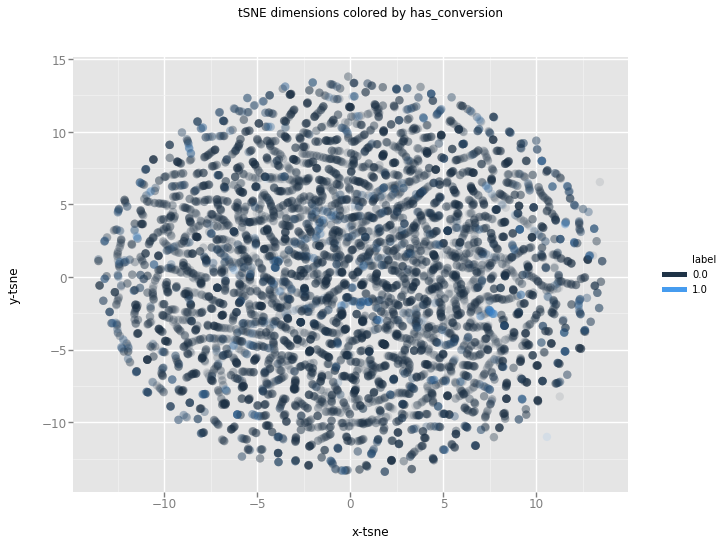

<ggplot: (-9223363274837806981)>

In [9]:
df = df_users.merge(df_labels, how='inner', on='person')

df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label')) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by has_conversion")
chart

##### Ahora ploteamos con K-means

In [10]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

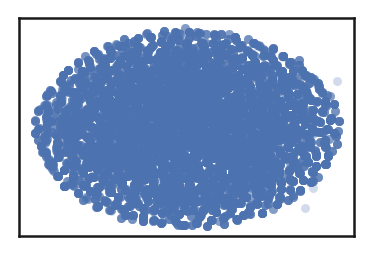

In [11]:
data = df_tsne.copy()
data['x'] = data['x-tsne']
data['y'] = data['y-tsne']

plt.scatter(data['x'], data['y'], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [12]:
def plot_clusters(data, algorithm, args, kwds, plot_kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data['x'], data['y'], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    return labels

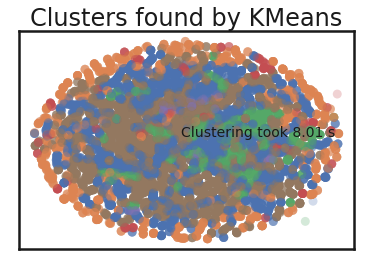

In [13]:
labels = plot_clusters(data, cluster.KMeans, (), {'n_clusters':6}, plot_kwds)

In [14]:
display(labels)
df_users['k_mean'] = labels

array([0, 5, 5, ..., 5, 2, 0], dtype=int32)

##### Ahora ploteamos con HDBScan

array([71, 66, 74, ..., 74, -1, 72])

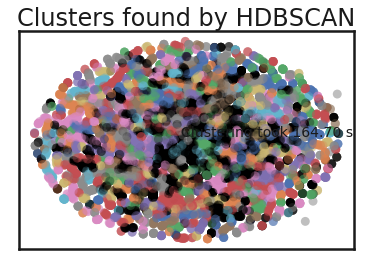

In [16]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':22}, plot_kwds)

## Análisis comportamiento antes de compra

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [18]:
df_events = pd.read_csv('./data/events_up_to_01062018.csv', low_memory=False)
df_sessions = pd.read_csv('./data/sessions.csv', low_memory=False)
df_brands = pd.read_csv('./data/brands.csv')
df_os = pd.read_csv('./data/os.csv')
df_browsers = pd.read_csv('./data/browsers.csv')
df_prices = pd.read_csv('./data/prices.csv')

df = df_events.merge(df_sessions, how='left', left_index=True, right_index=True)
df = df.merge(df_browsers, how='left', on='browser_version')
df = df.merge(df_os, how='left', on='operating_system_version')
df = df.merge(df_brands, how='left', on='model')
df = df.merge(df_prices, how='left', on='sku')

In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['session_timestamp_first'] = pd.to_datetime(df['session_timestamp_first'])
df['session_timestamp_last'] = pd.to_datetime(df['session_timestamp_last'])
df['month_number'] = df['timestamp'].dt.month

df['is_viewed_product'] = df['event'] == 'viewed product'
df['is_conversion'] = df['event'] == 'conversion'
df['is_checkout'] = df['event'] == 'checkout'
df['session_checkout_first'] = df['session_first'] & df['session_has_checkout']
df['session_conversion_first'] = df['session_first'] & df['session_has_conversion']
df['session_ad_first'] = df['session_first'] & df['session_ad']
df['session_ad_checkout_event'] = df['session_first'] & df['session_checkout_first']
df['session_ad_conversion_event'] = df['session_first'] & df['session_conversion_first']

In [20]:
df

timestamp              event    person                                   url      sku                                model           condition storage            color                                               skus     search_term   staticpage campaign_source search_engine channel new_vs_returning city region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
0       2018-05-18 00:11:59     viewed product  4886f805                                   NaN   9288.0              Samsung Galaxy J7 Prime           Excelente    32GB          Dourado                                                NaN             NaN          NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       0.050000           0                     9              7          False         False                        0.0                   False                      1.0                  True       False     2018-05-18 00:07:22    2018-05-18 00:30:30     NaN              NaN   samsung          749.0             5               True          False        False                   False                     False             False                      False                        False
1       2018-05-18 00:11:27     viewed product  ad93850f                                   NaN    304.0                            iPhone 5s           Muito Bom    32GB   Cinza espacial                                                NaN             NaN          NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       0.016667           2                    31              2          False         False                        0.0                   False                      0.0                 False        True     2018-05-18 00:11:26    2018-05-18 00:23:33     NaN              NaN    iphone         1679.0             5               True          False        False                   False                     False             False                      False                        False
2       2018-05-18 00:11:16     viewed product  0297fc1e                                   NaN   6888.0                            iPhone 6S           Muito Bom    64GB         Prateado                                                NaN             NaN          NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       0.116667          78                     2              1          False          True                        0.0                   False                      0.0                 False       False     2018-05-18 00:11:09    2018-05-18 00:11:16     NaN              NaN    iphone         2329.0             5               True          False        False                   False                     False             False                      False                        False
3       2018-05-18 00:11:14     viewed product  2d681dd8                                   NaN  11890.0                             iPhone 7                 Bom   128GB         Vermelho                                                NaN             NaN          NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       0.616667    

In [21]:
df = df.sort_values(['person', 'timestamp'])
df_lm = df[df['timestamp'] >= pd.to_datetime('2018-05-01')]
df_blm = df[df['timestamp'] < pd.to_datetime('2018-05-01')]
df_lw = df[df['timestamp'] >= pd.to_datetime('2018-05-23')]

In [22]:
amount_of_boughts = df['session_conversion_first'].sum()
amount_of_boughts_lm = df_lm['session_conversion_first'].sum()
amount_of_boughts_blm = df_blm['session_conversion_first'].sum()
amount_of_boughts_lw = df_lw['session_conversion_first'].sum()

users_that_bought = df[['person', 'session_conversion_first']]['person'].unique()
users_that_bought_lm = df_lm[['person', 'session_conversion_first']]['person'].unique()
users_that_bought_blm = df_blm[['person', 'session_conversion_first']]['person'].unique()
users_that_bought_lw = df_lw[['person', 'session_conversion_first']]['person'].unique()

amount_of_users_that_bought = len(users_that_bought)
amount_of_users_that_bought_lm = len(users_that_bought_lm)
amount_of_users_that_bought_blm = len(users_that_bought_blm)
amount_of_users_that_bought_lw = len(users_that_bought_lw)

print(f"{amount_of_users_that_bought} made {amount_of_boughts} boughts.")
print(f"{amount_of_users_that_bought_lm} made {amount_of_boughts_lm} boughts last month.")
print(f"{amount_of_users_that_bought_blm} made {amount_of_boughts_blm} boughts before last month.")
print(f"{amount_of_users_that_bought_lw} made {amount_of_boughts_lw} boughts last week.")

users_that_bought_before_and_in_lm = list(filter(lambda x: x in users_that_bought_lm, users_that_bought_blm))

38829 made 6015 boughts.
37143 made 4682 boughts last month.
8734 made 1333 boughts before last month.
24393 made 2184 boughts last week.


In [23]:
for i in range(1, 6):
    df_month = df[df['timestamp'].dt.month == i]

    amount_of_boughts_in_month = df_month['session_conversion_first'].sum()
    users_that_bought_in_month = df_month[['person', 'session_conversion_first']]['person'].unique()
    amount_of_users_that_bought_in_month = len(users_that_bought_in_month)

    print(f"{amount_of_users_that_bought_in_month} made {amount_of_boughts_in_month} boughts in month {i}.")

1237 made 151 boughts in month 1.
1806 made 184 boughts in month 2.
3705 made 474 boughts in month 3.
6386 made 524 boughts in month 4.
37143 made 4682 boughts in month 5.


In [24]:
# !!!!
df_lm[df_lm['session_total_conversions'] > 0]

timestamp              event    person                                          url      sku                              model           condition storage            color                                               skus     search_term staticpage campaign_source search_engine   channel new_vs_returning                    city              region  country device_type screen_resolution operating_system_version     browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last        browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
1934399 2018-05-26 11:59:46    generic listing  000ba417                                          NaN      NaN                                NaN                 NaN     NaN              NaN  2820,6705,2750,6720,6649,7252,12604,12620,7224...             NaN        NaN             NaN           NaN       NaN              NaN                     NaN                 NaN      NaN         NaN               NaN                      NaN                 NaN    2534.983333           4                    59              0           True         False                        1.0                    True                      1.0                  True       False     2018-05-26 11:59:46    2018-05-26 13:09:22            NaN              NaN       NaN            NaN             5              False          False        False                    True                      True             False                       True                         True
2229931 2018-05-26 11:59:46       visited site  000ba417                                          NaN      NaN                                NaN                 NaN     NaN              NaN                                                NaN             NaN        NaN             NaN           NaN    Direct        Returning     Rio Grande da Serra           Sao Paulo   Brazil    Computer          1024x768              Windows 10          Chrome 66.0       0.000000           4                    59              1          False         False                        1.0                    True                      1.0                  True       False     2018-05-26 11:59:46    2018-05-26 13:09:22         chrome          windows       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
945766  2018-05-26 12:00:02     viewed product  000ba417                                          NaN  11806.0           Sony Xperia M4 Aqua Dual                 Bom    16GB            Preto                                                NaN             NaN        NaN             NaN           NaN       NaN              NaN                     NaN                 NaN      NaN         NaN               NaN                      NaN                 NaN       0.266667           4                    59              2          False         False                        1.0                    True                      1.0                  True       False     2018-05-26 11:59:46    2018-05-26 13:09:22            NaN              NaN      sony         2469.0             5               True          False        False                   False                     False             False                      False                        False
1934401 2018-05-26 12:00:23    generic listing  000ba417                                          NaN      NaN                                NaN                 NaN     NaN              NaN  2820,6705,2750,6720,6649,7252,12604,12620,

---

##### Sujeto 000ba417

In [25]:
df[(df['person'] == '000ba417') & (df['event'] == 'conversion')]

timestamp       event    person  url     sku                model condition storage  color skus search_term staticpage campaign_source search_engine channel new_vs_returning city region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
945641 2018-05-26 13:09:22  conversion  000ba417  NaN  7631.0  Motorola Moto G3 4G       Bom    16GB  Preto  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       6.333333           4                    59             58          False          True                        1.0                    True                      1.0                  True       False     2018-05-26 11:59:46    2018-05-26 13:09:22     NaN              NaN  motorola         2469.0             5              False           True        False                   False                     False             False                      False                        False

In [26]:
df[(df['person'] == '000ba417') & (df['session_id'] == 4)]

timestamp            event    person  url      sku                        model  condition storage            color                                               skus search_term staticpage campaign_source search_engine channel new_vs_returning                 city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
1934399 2018-05-26 11:59:46  generic listing  000ba417  NaN      NaN                          NaN        NaN     NaN              NaN  2820,6705,2750,6720,6649,7252,12604,12620,7224...         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN    2534.983333           4                    59              0           True         False                        1.0                    True                      1.0                  True       False     2018-05-26 11:59:46    2018-05-26 13:09:22     NaN              NaN       NaN            NaN             5              False          False        False                    True                      True             False                       True                         True
2229931 2018-05-26 11:59:46     visited site  000ba417  NaN      NaN                          NaN        NaN     NaN              NaN                                                NaN         NaN        NaN             NaN           NaN  Direct        Returning  Rio Grande da Serra  Sao Paulo  Brazil    Computer          1024x768              Windows 10      Chrome 66.0       0.000000           4                    59              1          False         False                        1.0                    True                      1.0                  True       False     2018-05-26 11:59:46    2018-05-26 13:09:22  chrome          windows       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
945766  2018-05-26 12:00:02   viewed product  000ba417  NaN  11806.0     Sony Xperia M4 Aqua Dual        Bom    16GB            Preto                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.266667           4                    59              2          False         False                        1.0                    True                      1.0                  True       False     2018-05-26 11:59:46    2018-05-26 13:09:22     NaN              NaN      sony         2469.0             5               True          False        False                   False                     False             False                      False                        False
1934401 2018-05-26 12:00:23  generic listing  000ba417  NaN      NaN                          NaN        NaN     NaN              NaN  2820,6705,2750,6720,6649,7252,12604,12620,7224...         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.350000           4                    59              3          False         False                        1.0                    True                      1.0                  True       False     2

In [27]:
df[(df['person'] == '000ba417') & (df['session_id'] == 3)]

timestamp            event    person  url      sku                              model  condition storage           color                                               skus search_term staticpage campaign_source search_engine channel new_vs_returning                 city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
1934243 2018-05-24 16:13:57  generic listing  000ba417  NaN      NaN                                NaN        NaN     NaN             NaN  6637,6649,7252,2750,2820,6720,6707,7224,12619,...         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN    9978.783333           3                    79              0           True         False                        0.0                   False                      2.0                  True       False     2018-05-24 16:13:57    2018-05-24 17:44:47     NaN              NaN       NaN            NaN             5              False          False        False                    True                     False             False                       True                        False
2229930 2018-05-24 16:13:57     visited site  000ba417  NaN      NaN                                NaN        NaN     NaN             NaN                                                NaN         NaN        NaN             NaN           NaN  Direct        Returning  Rio Grande da Serra  Sao Paulo  Brazil    Computer          1024x768              Windows 10      Chrome 66.0       0.000000           3                    79              1          False         False                        0.0                   False                      2.0                  True       False     2018-05-24 16:13:57    2018-05-24 17:44:47  chrome          windows       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
1934246 2018-05-24 16:15:15    brand listing  000ba417  NaN      NaN                                NaN        NaN     NaN             NaN  6357,3371,6371,2777,2718,10897,3191,6413,6791,...         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN       1.300000           3                    79              2          False         False                        0.0                   False                      2.0                  True       False     2018-05-24 16:13:57    2018-05-24 17:44:47     NaN              NaN       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
847679  2018-05-24 16:15:30   viewed product  000ba417  NaN  15383.0                  Samsung Galaxy J5        Bom     8GB           Preto                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.250000           3                    79              3          False         False                        0.0                   False                      2.0               

In [28]:
df[(df['person'] == '000ba417') & (df['session_id'] == 1)]

timestamp            event    person  url     sku                        model  condition storage   color                                               skus search_term staticpage campaign_source search_engine channel new_vs_returning                 city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system    brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
1933678 2018-05-17 12:57:16  generic listing  000ba417  NaN     NaN                          NaN        NaN     NaN     NaN  6594,6650,6663,1061,12606,11346,2774,7337,2773...         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN      69.450000           1                    11              0           True         False                        0.0                   False                      2.0                  True       False     2018-05-17 12:57:16    2018-05-17 13:12:28     NaN              NaN      NaN            NaN             5              False          False        False                    True                     False             False                       True                        False
2229928 2018-05-17 12:57:16     visited site  000ba417  NaN     NaN                          NaN        NaN     NaN     NaN                                                NaN         NaN        NaN             NaN           NaN  Direct        Returning  Rio Grande da Serra  Sao Paulo  Brazil    Computer          1024x768              Windows 10      Chrome 66.0       0.000000           1                    11              1          False         False                        0.0                   False                      2.0                  True       False     2018-05-17 12:57:16    2018-05-17 13:12:28  chrome          windows      NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
906672  2018-05-17 12:57:26   viewed product  000ba417  NaN  3347.0       Samsung Galaxy S6 Flat        Bom    32GB  Branco                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.166667           1                    11              2          False         False                        0.0                   False                      2.0                  True       False     2018-05-17 12:57:16    2018-05-17 13:12:28     NaN              NaN  samsung          669.0             5               True          False        False                   False                     False             False                      False                        False
1933679 2018-05-17 12:57:45    brand listing  000ba417  NaN     NaN                          NaN        NaN     NaN     NaN  3371,6357,6371,2718,3191,2777,2725,2893,6791,3...         NaN        NaN             NaN           NaN     NaN              NaN                  NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.316667           1                    11              3          False         False                        0.0                   False                      2.0                  True       False     2018-05-17 12:57:16    2018-05-17 13:12:28     NaN     

---
##### Sujeto 001001be

In [29]:
df[(df['person'] == '001001be') & (df['event'] == 'conversion')]

timestamp       event    person  url    sku      model  condition storage    color skus search_term staticpage campaign_source search_engine channel new_vs_returning city region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system   brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
96619 2018-05-16 19:31:00  conversion  001001be  NaN  290.0  iPhone 5s  Muito Bom    16GB  Dourado  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN           9.65           0                    66             64          False         False                        1.0                    True                      3.0                  True       False     2018-05-16 18:36:19    2018-05-16 19:32:26     NaN              NaN  iphone         1069.0             5              False           True        False                   False                     False             False                      False                        False

In [30]:
df[(df['person'] == '001001be') & (df['session_id'] == 0)]

timestamp              event    person  url     sku          model           condition storage           color                                               skus search_term staticpage campaign_source search_engine  channel new_vs_returning       city     region country device_type screen_resolution operating_system_version     browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last        browser operating_system   brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
1859207 2018-05-16 18:36:19    generic listing  001001be  NaN     NaN            NaN                 NaN     NaN             NaN  6594,7253,6719,2820,2766,2774,2773,7337,2813,1...         NaN        NaN             NaN           NaN      NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN                 NaN       0.000000           0                    66              0           True         False                        1.0                    True                      3.0                  True       False     2018-05-16 18:36:19    2018-05-16 19:32:26            NaN              NaN     NaN            NaN             5              False          False        False                    True                      True             False                       True                         True
2193921 2018-05-16 18:36:19       visited site  001001be  NaN     NaN            NaN                 NaN     NaN             NaN                                                NaN         NaN        NaN             NaN           NaN  Organic              New  São Paulo  Sao Paulo  Brazil  Smartphone           360x640                Android 7  Chrome Mobile 66.0       0.000000           0                    66              1          False         False                        1.0                    True                      3.0                  True       False     2018-05-16 18:36:19    2018-05-16 19:32:26  chrome mobile          android     NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
602642  2018-05-16 18:36:39  searched products  001001be  NaN     NaN            NaN                 NaN     NaN             NaN  6023,2694,5904,6243,6011,6250,5907,2696,333,60...          5s        NaN             NaN           NaN      NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN                 NaN       0.333333           0                    66              2          False         False                        1.0                    True                      3.0                  True       False     2018-05-16 18:36:19    2018-05-16 19:32:26            NaN              NaN     NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
603625  2018-05-16 18:37:10  searched products  001001be  NaN     NaN            NaN                 NaN     NaN             NaN  6001,2833,2831,6253,2834,1358,2837,2832,1382,1...   IPhone  6        NaN             NaN           NaN      NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN                 NaN       0.516667           0                    66              3          False         False                        1.0                    True                      3.0                  True       False     2018-05-16 18:36:19    2018-05-

---
##### Sujeto 0019e639

In [31]:
df[(df['person'] == '0019e639') & (df['event'] == 'conversion')]

timestamp       event    person  url     sku                     model  condition storage  color skus search_term staticpage campaign_source search_engine channel new_vs_returning city region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
708847 2018-02-09 15:03:19  conversion  0019e639  NaN  2750.0   Samsung Galaxy Win Duos        Bom     8GB  Cinza  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       0.633333           1                    63             29          False         False                        1.0                    True                      8.0                  True       False     2018-02-09 14:41:34    2018-02-09 15:18:37     NaN              NaN   samsung         2469.0             2              False           True        False                   False                     False             False                      False                        False
386869 2018-05-22 22:13:09  conversion  0019e639  NaN   508.0  Motorola Moto G2 3G Dual  Muito Bom    16GB  Preto  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       2.450000          18                    17              9          False         False                        1.0                    True                      2.0                  True        True     2018-05-22 22:09:17    2018-05-22 22:15:57     NaN              NaN  motorola         2329.0             5              False           True        False                   False                     False             False                      False                        False

In [32]:
df[(df['person'] == '0019e639') & (df['session_id'] == 18)]

timestamp            event    person                               url     sku                     model  condition storage  color                                               skus search_term staticpage campaign_source search_engine channel new_vs_returning       city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
385936  2018-05-22 22:09:17  ad campaign hit  0019e639  /comprar/samsung/galaxy-win-duos     NaN                       NaN        NaN     NaN    NaN                                                NaN         NaN        NaN        rtbhouse           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN     370.050000          18                    17              0           True         False                        1.0                    True                      2.0                  True        True     2018-05-22 22:09:17    2018-05-22 22:15:57     NaN              NaN       NaN            NaN             5              False          False        False                    True                      True              True                       True                         True
2192250 2018-05-22 22:09:17     visited site  0019e639                               NaN     NaN                       NaN        NaN     NaN    NaN                                                NaN         NaN        NaN             NaN           NaN    Paid        Returning  Guarulhos  Sao Paulo  Brazil    Computer          1366x768               Windows 7      Chrome 66.0       0.000000          18                    17              1          False         False                        1.0                    True                      2.0                  True        True     2018-05-22 22:09:17    2018-05-22 22:15:57  chrome          windows       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
385937  2018-05-22 22:09:19   viewed product  0019e639                               NaN  2750.0   Samsung Galaxy Win Duos        Bom     8GB  Cinza                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.033333          18                    17              2          False         False                        1.0                    True                      2.0                  True        True     2018-05-22 22:09:17    2018-05-22 22:15:57     NaN              NaN   samsung         2469.0             5               True          False        False                   False                     False             False                      False                        False
1865094 2018-05-22 22:10:04  generic listing  0019e639                               NaN     NaN                       NaN        NaN     NaN    NaN  6594,6636,2820,6707,2750,12619,11346,2766,1260...         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.750000          18                    17              3          False         False                        1.0                    True                      2.0               

In [33]:
df[(df['person'] == '0019e639') & (df['session_id'] == 17)]

timestamp              event    person                                  url      sku                     model  condition storage    color                                               skus search_term staticpage campaign_source search_engine channel new_vs_returning       city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
387311  2018-05-22 15:22:21    ad campaign hit  0019e639  /comprar/motorola/moto-g-2a-geracao      NaN                       NaN        NaN     NaN      NaN                                                NaN         NaN        NaN          google           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN    5196.483333          17                    53              0           True         False                        0.0                   False                      1.0                  True        True     2018-05-22 15:22:21    2018-05-22 15:59:14     NaN              NaN       NaN            NaN             5              False          False        False                    True                     False              True                       True                        False
2192249 2018-05-22 15:22:21       visited site  0019e639                                  NaN      NaN                       NaN        NaN     NaN      NaN                                                NaN         NaN        NaN             NaN           NaN    Paid        Returning  Guarulhos  Sao Paulo  Brazil    Computer          1366x768               Windows 7      Chrome 66.0       0.000000          17                    53              1          False         False                        0.0                   False                      1.0                  True        True     2018-05-22 15:22:21    2018-05-22 15:59:14  chrome          windows       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
388237  2018-05-22 15:22:22     viewed product  0019e639                                  NaN    725.0  Motorola Moto G2 3G Dual  Muito Bom     8GB    Preto                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.016667          17                    53              2          False         False                        0.0                   False                      1.0                  True        True     2018-05-22 15:22:21    2018-05-22 15:59:14     NaN              NaN  motorola         2329.0             5               True          False        False                   False                     False             False                      False                        False
387312  2018-05-22 15:22:31     viewed product  0019e639                                  NaN   2766.0  Motorola Moto G2 3G Dual        Bom     8GB    Preto                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.150000          17                    53              3          False         False                        0.0                   False

In [34]:
df[(df['person'] == '0019e639') & (df['session_id'] == 16)]

timestamp            event    person                url  sku model condition storage color                                               skus search_term staticpage campaign_source search_engine channel new_vs_returning       city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
512474  2018-05-19 00:45:52  ad campaign hit  0019e639  /comprar/motorola  NaN   NaN       NaN     NaN   NaN                                                NaN         NaN        NaN          google           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN     537.933333          16                     3              0           True         False                        0.0                   False                      0.0                 False        True     2018-05-19 00:45:52    2018-05-19 00:45:52     NaN              NaN   NaN            NaN             5              False          False        False                   False                     False              True                      False                        False
1860171 2018-05-19 00:45:52    brand listing  0019e639                NaN  NaN   NaN       NaN     NaN   NaN  7631,9174,5016,5088,9217,5135,3107,4883,8429,9...         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.000000          16                     3              1          False         False                        0.0                   False                      0.0                 False        True     2018-05-19 00:45:52    2018-05-19 00:45:52     NaN              NaN   NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
2192248 2018-05-19 00:45:52     visited site  0019e639                NaN  NaN   NaN       NaN     NaN   NaN                                                NaN         NaN        NaN             NaN           NaN    Paid        Returning  São Paulo  Sao Paulo  Brazil    Computer          1366x768               Windows 7      Chrome 66.0       0.000000          16                     3              2          False          True                        0.0                   False                      0.0                 False        True     2018-05-19 00:45:52    2018-05-19 00:45:52  chrome          windows   NaN            NaN             5              False          False        False                   False                     False             False                      False                        False

In [35]:
df[(df['person'] == '0019e639') & (df['session_id'] == 15)]

timestamp            event    person                                  url     sku                     model  condition storage  color skus search_term staticpage campaign_source search_engine channel new_vs_returning       city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
547913  2018-05-18 15:46:40  ad campaign hit  0019e639  /comprar/motorola/moto-g-2a-geracao     NaN                       NaN        NaN     NaN    NaN  NaN         NaN        NaN          google           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN    2889.983333          15                     8              0           True         False                        0.0                   False                      0.0                 False        True     2018-05-18 15:46:40    2018-05-18 15:47:56     NaN              NaN       NaN            NaN             5              False          False        False                   False                     False              True                      False                        False
548592  2018-05-18 15:46:40   viewed product  0019e639                                  NaN   723.0  Motorola Moto G2 3G Dual  Excelente     8GB  Preto  NaN         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.000000          15                     8              1          False         False                        0.0                   False                      0.0                 False        True     2018-05-18 15:46:40    2018-05-18 15:47:56     NaN              NaN  motorola         1939.0             5               True          False        False                   False                     False             False                      False                        False
2192247 2018-05-18 15:46:40     visited site  0019e639                                  NaN     NaN                       NaN        NaN     NaN    NaN  NaN         NaN        NaN             NaN           NaN    Paid        Returning  São Paulo  Sao Paulo  Brazil    Computer          1366x768               Windows 7      Chrome 66.0       0.000000          15                     8              2          False         False                        0.0                   False                      0.0                 False        True     2018-05-18 15:46:40    2018-05-18 15:47:56  chrome          windows       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
548415  2018-05-18 15:46:49   viewed product  0019e639                                  NaN   725.0  Motorola Moto G2 3G Dual  Muito Bom     8GB  Preto  NaN         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.150000          15                     8              3          False         False                        0.0                   False                      0.0                 False        True     2018-05-18 15:46:40    2018-05-18 15:47:56     NaN              NaN  motorola         2329.0             5               True          False        False                   False              

In [36]:
df[(df['person'] == '0019e639') & (df['session_id'] == 14)]

timestamp            event    person                                  url      sku                     model  condition storage        color                                               skus search_term staticpage campaign_source search_engine channel new_vs_returning       city     region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system     brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
601692  2018-05-16 15:11:23  ad campaign hit  0019e639     /comprar/samsung/galaxy-win-duos      NaN                       NaN        NaN     NaN          NaN                                                NaN         NaN        NaN        rtbhouse           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN    1367.200000          14                    55              0           True         False                        0.0                   False                      0.0                 False        True     2018-05-16 15:11:23    2018-05-16 15:36:41     NaN              NaN       NaN            NaN             5              False          False        False                   False                     False              True                      False                        False
2192246 2018-05-16 15:11:23     visited site  0019e639                                  NaN      NaN                       NaN        NaN     NaN          NaN                                                NaN         NaN        NaN             NaN           NaN    Paid        Returning  Guarulhos  Sao Paulo  Brazil    Computer          1366x768               Windows 7      Chrome 66.0       0.000000          14                    55              1          False         False                        0.0                   False                      0.0                 False        True     2018-05-16 15:11:23    2018-05-16 15:36:41  chrome          windows       NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
601693  2018-05-16 15:11:24   viewed product  0019e639                                  NaN   2750.0   Samsung Galaxy Win Duos        Bom     8GB        Cinza                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.016667          14                    55              2          False         False                        0.0                   False                      0.0                 False        True     2018-05-16 15:11:23    2018-05-16 15:36:41     NaN              NaN   samsung         2469.0             5               True          False        False                   False                     False             False                      False                        False
601758  2018-05-16 15:11:27   viewed product  0019e639                                  NaN    480.0   Samsung Galaxy Win Duos  Muito Bom     8GB        Cinza                                                NaN         NaN        NaN             NaN           NaN     NaN              NaN        NaN        NaN     NaN         NaN               NaN                      NaN             NaN       0.050000          14                    55              3          False         False                        0.0              

##### Sujeto 002ed810

In [37]:
df[(df['person'] == '002ed810') & (df['event'] == 'conversion')]

timestamp       event    person  url     sku              model condition storage  color skus search_term staticpage campaign_source search_engine channel new_vs_returning city region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system    brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
825176 2018-05-25 23:20:15  conversion  002ed810  NaN  8443.0  Samsung Galaxy S7       Bom    32GB  Preto  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       3.100000           2                    10              9          False          True                        1.0                    True                      1.0                  True       False     2018-05-25 22:34:15    2018-05-25 23:20:15     NaN              NaN  samsung         1269.0             5              False           True        False                   False                     False             False                      False                        False
859151 2018-05-29 19:56:35  conversion  002ed810  NaN  8443.0  Samsung Galaxy S7       Bom    32GB  Preto  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN       3.333333           6                     6              4          False         False                        1.0                    True                      1.0                  True       False     2018-05-29 19:48:54    2018-05-29 20:18:48     NaN              NaN  samsung         1269.0             5              False           True        False                   False                     False             False                      False                        False

In [38]:
df[(df['person'] == '002ed810') & (df['session_id'] == 2)]

timestamp              event    person  url      sku                   model condition storage  color                                               skus search_term staticpage campaign_source search_engine   channel new_vs_returning      city          region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system    brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
2191368 2018-05-25 22:34:15       visited site  002ed810  NaN      NaN                     NaN       NaN     NaN    NaN                                                NaN         NaN        NaN             NaN           NaN  Referral        Returning  Palmitos  Santa Catarina  Brazil    Computer          1536x864              Windows 10      Chrome 66.0     403.866667           2                    10              0           True         False                        1.0                    True                      1.0                  True       False     2018-05-25 22:34:15    2018-05-25 23:20:15  chrome          windows      NaN            NaN             5              False          False        False                    True                      True             False                       True                         True
1866154 2018-05-25 22:35:07    generic listing  002ed810  NaN      NaN                     NaN       NaN     NaN    NaN  6665,6651,7253,2750,2820,6705,6720,7224,12604,...         NaN        NaN             NaN           NaN       NaN              NaN       NaN             NaN     NaN         NaN               NaN                      NaN             NaN       0.866667           2                    10              1          False         False                        1.0                    True                      1.0                  True       False     2018-05-25 22:34:15    2018-05-25 23:20:15     NaN              NaN      NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
1866155 2018-05-25 22:35:14      brand listing  002ed810  NaN      NaN                     NaN       NaN     NaN    NaN                                8499,8485,8443,8471         NaN        NaN             NaN           NaN       NaN              NaN       NaN             NaN     NaN         NaN               NaN                      NaN             NaN       0.116667           2                    10              2          False         False                        1.0                    True                      1.0                  True       False     2018-05-25 22:34:15    2018-05-25 23:20:15     NaN              NaN      NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
381237  2018-05-25 22:35:26     viewed product  002ed810  NaN  12800.0  Samsung Galaxy S8 Plus       Bom    64GB  Prata                                                NaN         NaN        NaN             NaN           NaN       NaN              NaN       NaN             NaN     NaN         NaN               NaN                      NaN             NaN       0.200000           2                    10              3          False         False                        1.0                    True                      1.0                  True       False     2018-05-25 22:34:15    2018-05-25 23:20:15     NaN              NaN  samsung         2469.0    

In [39]:
df[(df['person'] == '002ed810') & (df['session_id'] == 1)]

timestamp              event    person  url     sku              model condition storage    color                                               skus search_term staticpage campaign_source search_engine  channel new_vs_returning      city          region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system    brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
395652  2018-05-25 15:49:15  search engine hit  002ed810  NaN     NaN                NaN       NaN     NaN      NaN                                                NaN         NaN        NaN             NaN        Google      NaN              NaN       NaN             NaN     NaN         NaN               NaN                      NaN             NaN   51220.833333           1                    13              0           True         False                        0.0                   False                      0.0                 False       False     2018-05-25 15:49:15    2018-05-25 15:50:23     NaN              NaN      NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
1866032 2018-05-25 15:49:15    generic listing  002ed810  NaN     NaN                NaN       NaN     NaN      NaN  6637,7252,2750,2820,6707,12604,7224,6649,2774,...         NaN        NaN             NaN           NaN      NaN              NaN       NaN             NaN     NaN         NaN               NaN                      NaN             NaN       0.000000           1                    13              1          False         False                        0.0                   False                      0.0                 False       False     2018-05-25 15:49:15    2018-05-25 15:50:23     NaN              NaN      NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
2191367 2018-05-25 15:49:15       visited site  002ed810  NaN     NaN                NaN       NaN     NaN      NaN                                                NaN         NaN        NaN             NaN           NaN  Organic        Returning  Palmitos  Santa Catarina  Brazil    Computer          1536x864              Windows 10      Chrome 66.0       0.000000           1                    13              2          False         False                        0.0                   False                      0.0                 False       False     2018-05-25 15:49:15    2018-05-25 15:50:23  chrome          windows      NaN            NaN             5              False          False        False                   False                     False             False                      False                        False
1866033 2018-05-25 15:49:23      brand listing  002ed810  NaN     NaN                NaN       NaN     NaN      NaN                                8499,8485,8443,8471         NaN        NaN             NaN           NaN      NaN              NaN       NaN             NaN     NaN         NaN               NaN                      NaN             NaN       0.133333           1                    13              3          False         False                        0.0                   False                      0.0                 False       False     2018-05-25 15:49:15    2018-05-25 15:50:23     NaN              NaN      NaN            NaN             5              F

In [40]:
df[(df['person'] == '002ed810') & (df['session_id'] == 0)]

timestamp              event    person  url     sku              model condition storage  color                                               skus search_term staticpage campaign_source search_engine  channel new_vs_returning              city          region country device_type screen_resolution operating_system_version browser_version  time_diff_min  session_id  session_total_events  session_cumno  session_first  session_last  session_total_conversions  session_has_conversion  session_total_checkouts  session_has_checkout  session_ad session_timestamp_first session_timestamp_last browser operating_system    brand  precio_reales  month_number  is_viewed_product  is_conversion  is_checkout  session_checkout_first  session_conversion_first  session_ad_first  session_ad_checkout_event  session_ad_conversion_event
706985  2018-04-20 02:07:19  search engine hit  002ed810  NaN     NaN                NaN       NaN     NaN    NaN                                                NaN         NaN        NaN             NaN        Google      NaN              NaN               NaN             NaN     NaN         NaN               NaN                      NaN             NaN       0.000000           0                     6              0           True         False                        0.0                   False                      0.0                 False       False     2018-04-20 02:07:19    2018-04-20 02:08:25     NaN              NaN      NaN            NaN             4              False          False        False                   False                     False             False                      False                        False
1868712 2018-04-20 02:07:19    generic listing  002ed810  NaN     NaN                NaN       NaN     NaN    NaN  14296,10254,9918,12802,12786,12772,10084,9930,...         NaN        NaN             NaN           NaN      NaN              NaN               NaN             NaN     NaN         NaN               NaN                      NaN             NaN       0.000000           0                     6              1          False         False                        0.0                   False                      0.0                 False       False     2018-04-20 02:07:19    2018-04-20 02:08:25     NaN              NaN      NaN            NaN             4              False          False        False                   False                     False             False                      False                        False
2191369 2018-04-20 02:07:19       visited site  002ed810  NaN     NaN                NaN       NaN     NaN    NaN                                                NaN         NaN        NaN             NaN           NaN  Organic              New  Aguas de Chapeco  Santa Catarina  Brazil    Computer          1536x864              Windows 10      Chrome 65.0       0.000000           0                     6              2          False         False                        0.0                   False                      0.0                 False       False     2018-04-20 02:07:19    2018-04-20 02:08:25  chrome          windows      NaN            NaN             4              False          False        False                   False                     False             False                      False                        False
708276  2018-04-20 02:08:20     viewed product  002ed810  NaN  8443.0  Samsung Galaxy S7       Bom    32GB  Preto                                                NaN         NaN        NaN             NaN           NaN      NaN              NaN               NaN             NaN     NaN         NaN               NaN                      NaN             NaN       1.016667           0                     6              3          False         False                        0.0                   False                      0.0                 False       False     2018-04-20 02:07:19    2018-04-20 02:08:25     NaN              NaN  samsung         1269.